In [487]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import *
from sklearn.metrics import r2_score

In [749]:
class dataset(): 
    
    def __init__(self,data = None, label = None):
        self.data = np.array(data,dtype = float)
        self.label= label
        self.reduced_label = []
        self.bin_label = -1*np.ones(len(label))
    def mean_(self):
        mean = self.data.mean(0)
        return mean
    
    def std_(self):
        std = self.data.std(0)
        return std
    
    def label_convert(self):
        label_set = list(set(self.label))
        for i in range(len(label_set)):
            for en in self.label:
                if label_set[i] == en:
                    self.reduced_label.append(i)
                else:
                    continue
        return self.reduced_label
        
    def genre_num(self):
        class_distribution ={}
        all_genre = set(self.label)
        for item in all_genre:
            class_distribution[item]=0
            for en in self.label:
                if en == item:
                    class_distribution[en]+=1
                else:
                    continue    
        return class_distribution
    
    def binary_label(self,target):
#         if len(self.label)==0:
#             self.reduced_label= self.label_convert()
        
        for e in range(len(self.label)):
            if self.label[e] == target:
                self.bin_label[e]=1
            else:
                continue
        return self.bin_label
                
    
    def split_set(self, scale):
        if len(self.reduced_label)==0:
            self.reduced_label= self.label_convert()
        joint = list(zip(self.data,self.reduced_label))
#         joint = list(zip(self.data,self.bin_label))
        random.shuffle(joint) 
        
        data_,label_ = zip(*joint)
        
        train = dataset(data= data_[0:int(scale*len(data_))],label=label_[0:int(scale*len(label_))])
        
        test = dataset(data= data_[int(scale*len(data_)):],label =label_[int(scale*len(label_)):])
        
        return train,test

    def normalisation(self):
        self.data = abs(self.data-self.mean_())**2 / (self.std_())**2    
        return self.data
    
    
        

In [766]:
def get_data():
    data=[]
    label=[]
    with open('iris.data','r') as f:
        for item in f:
            flower = item.split(',')
            feature = flower[0:4]
            genre = flower[-1].strip('\n')
            if len(feature) != 4:
                continue
            else:
                data.append(feature)
                label.append(genre)
                
    return data,label

def figure_plot(all_data):
    _,d = np.shape(all_data.data)
    for i in range(d):
        plt.hist(all_data.data[:,i], edgecolor='k', alpha=0.35) 
        plt.title('feature %d'%(i+1))
        plt.grid(True)
        plt.savefig('feature'+str(i)+'.jpg')
        plt.show()

def calc_rscore(p):
    model = linear_mod()
    model.fit(p,0.01,100)
    w=model.w
    b= model.b
    x = p[:][0]
    y = p[:][1]
    y_pred = x.dot(w)+b
    
    return r2_score(y,y_pred)
    
def calc_mse(b,w,points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[:][0][i]
        y = points[:][1][i]
        totalError += (y - (w.dot(x) + b)) ** 2
    
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b = b_current
    w = m_current
    N,d = np.shape(points[:][0])
    w_grad = np.zeros([d])
    b_grad = 0
    for i in range(len(points[:][1])):
        x = points[:][0][i]
        y = points[:][1][i] 
        w_grad += -(2/N)*(y- (w.dot(x)+b))*x
        b_grad += -(2/N)*(y- (w.dot(x)+b))

    new_w = w -(learningRate * w_grad)
    new_b = b -(learningRate * b_grad)

    return new_w,new_b

def gradient_descent(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    w = starting_m

    for i in range(num_iterations):
        w, b = step_gradient(b, w, points, learning_rate)              

         
    return w,b


def calc_acc(model,data):
    w = model.w
    b = model.b
    x = data[:][0]
    y = data[:][1]
    y_ = x.dot(w)+b
    
    accuracy=sum(np.where(y_>= 0,1,-1)==y)/len(y)
    return accuracy
    
    


In [658]:
class linear_mod():
    def __init__(self,w=0,b =0):
        self.w =w
        self.b =b 
        
    def fit(self,p,lr,num_iter):
        N,d = np.shape(p[:][0])
        self.w,self.b= gradient_descent(p,0,np.zeros(d), lr, num_iter)
        
        return self.w,self.b
        

# Exercise1 

In [750]:

data_,label_ = get_data()
all_data = dataset(data =data_,label= label_ )
all_data.label_convert()


p = [all_data.data[:,[0,2]],all_data.reduced_label]

score_1_3= calc_rscore([all_data.data[:,[0,2]],all_data.reduced_label])
score_1_2= calc_rscore([all_data.data[:,[0,1]],all_data.reduced_label])
score_1_4= calc_rscore([all_data.data[:,[0,3]],all_data.reduced_label])

print(score_1_3)
print(score_1_2)
print(score_1_4)

0.9053068619706772
0.5592104338400135
0.783754754179762


In [593]:
y = p[:][]
y

[]

# Exercise2

(array([1., 0., 2., 3., 2., 4., 7., 8., 2., 1.]),
 array([0.2       , 0.22166667, 0.24333333, 0.265     , 0.28666667,
        0.30833333, 0.33      , 0.35166667, 0.37333333, 0.395     ,
        0.41666667]),
 <BarContainer object of 10 artists>)

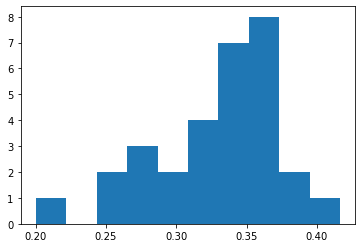

In [787]:
# Without normalise
Accuracy=[]
for i in range(30):
    train_set ,test_set = all_data.split_set(0.6)

    linear = linear_mod()
    linear.fit([train_set.data,train_set.binary_label(0)],0.1,100)

    calc_acc(linear,[test_set.data,test_set.binary_label(0)])

    Accuracy.append(calc_acc(linear,[test_set.data,test_set.binary_label(0)]))

plt.hist(Accuracy)

(array([1., 2., 1., 2., 1., 3., 3., 4., 7., 6.]),
 array([0.53333333, 0.57666667, 0.62      , 0.66333333, 0.70666667,
        0.75      , 0.79333333, 0.83666667, 0.88      , 0.92333333,
        0.96666667]),
 <BarContainer object of 10 artists>)

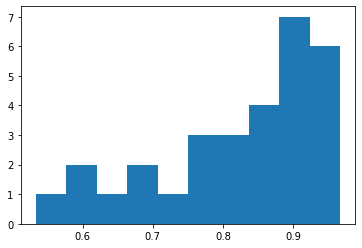

In [788]:
Accuracy=[]
for i in range(30):
    train_set ,test_set = all_data.split_set(0.6)
    train_set.normalisation()
    test_set.normalisation()
    linear = linear_mod()
    linear.fit([train_set.data,train_set.binary_label(0)],0.1,100)
    Accuracy.append(calc_acc(linear,[test_set.data,test_set.binary_label(0)]))

plt.hist(Accuracy)
# print(train_set.data)
# print('==================')
# # train_set.normalisation()
# print(train_set.normalisation())

# Exercise3 

(array([2., 0., 3., 5., 2., 7., 2., 5., 1., 3.]),
 array([0.87503923, 0.87964849, 0.88425776, 0.88886702, 0.89347629,
        0.89808556, 0.90269482, 0.90730409, 0.91191335, 0.91652262,
        0.92113189]),
 <BarContainer object of 10 artists>)

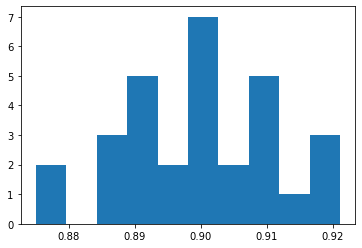

In [769]:
#without normalisation
Rscore = []
for i in range(30):
    train_set ,test_set = all_data.split_set(0.6)
    score = calc_rscore([train_set.data,train_set.binary_label(0)])
    Rscore.append(score)
    
plt.hist(Rscore)    

(array([5., 3., 2., 3., 5., 3., 4., 3., 0., 2.]),
 array([0.16323988, 0.19822958, 0.23321927, 0.26820897, 0.30319867,
        0.33818836, 0.37317806, 0.40816775, 0.44315745, 0.47814715,
        0.51313684]),
 <BarContainer object of 10 artists>)

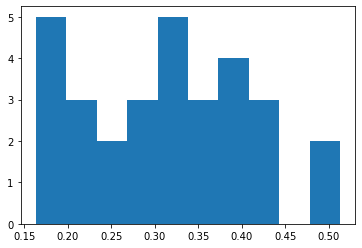

In [771]:
#With normalisation
Rscore = []
for i in range(30):
    train_set ,test_set = all_data.split_set(0.6)
    score = calc_rscore([train_set.normalisation(),train_set.binary_label(0)])
    Rscore.append(score)
    
plt.hist(Rscore) 

2